<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# Stabilty AI - Generate Image from text

**Tags:** #stabilityai #png #prompt #generate #file #python

**Author:** [Florent Ravenel](https://www.linkedin.com/in/florent-ravenel/)

**Description:** This notebook will demonstrate how to execute a basic image generation call via Stability AI API.

**References:**
- [Stability Sign up](https://beta.dreamstudio.ai/membership)
- [Stability Documentation](https://platform.stability.ai/)
- [Text-to-Image](https://platform.stability.ai/docs/features/text-to-image/python)

## Input

### Import libraries

In [1]:
import os
import io
import warnings
from PIL import Image
try:
    from stability_sdk import client
except:
    !pip install stability-sdk --user
    from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation
import naas

### Setup Variables
- `api_key`: [Stability API Key](https://beta.dreamstudio.ai/membership?tab=apiKeys)
- `prompt`: Sentences giving information about the image to be generated

In [2]:
# Inputs
api_key = naas.secret.get('STABILITY_KEY') or 'sk-M5xMxxxx9N9xxxxxxddLe' # Get your API Key once you have created an account: https://beta.dreamstudio.ai/membership?tab=apiKeys
prompt = "expansive landscape rolling greens with blue daisies and weeping willow trees under a blue alien sky, artstation, masterful, ghibli"

## Model

### Setup environment variables and API Key

In [3]:
# Our Host URL should not be prepended with "https" nor should it have a trailing slash.
os.environ['STABILITY_HOST'] = 'grpc.stability.ai:443'
os.environ['STABILITY_KEY'] = api_key

### Connect to client

In [4]:
# Set up our connection to the API.
stability_api = client.StabilityInference(
    key=os.environ['STABILITY_KEY'], # API Key reference.
    verbose=True, # Print debug messages.
    engine="stable-diffusion-v1-5", # Set the engine to use for generation.
    # Available engines: stable-diffusion-v1 stable-diffusion-v1-5 stable-diffusion-512-v2-0 stable-diffusion-768-v2-0
    # stable-diffusion-512-v2-1 stable-diffusion-768-v2-1 stable-inpainting-v1-0 stable-inpainting-512-v2-0
)

### Requests Stability API

In [5]:
answers = stability_api.generate(
    prompt=prompt,
    seed=992446758, # If a seed is provided, the resulting generated image will be deterministic.
                    # What this means is that as long as all generation parameters remain the same, you can always recall the same image simply by generating it again.
                    # Note: This isn't quite the case for Clip Guided generations, which we'll tackle in a future example notebook.
    steps=30, # Amount of inference steps performed on image generation. Defaults to 30.
    cfg_scale=8.0, # Influences how strongly your generation is guided to match your prompt.
                   # Setting this value higher increases the strength in which it tries to match your prompt.
                   # Defaults to 7.0 if not specified.
    width=512, # Generation width, defaults to 512 if not included.
    height=512, # Generation height, defaults to 512 if not included.
    samples=1, # Number of images to generate, defaults to 1 if not included.
    sampler=generation.SAMPLER_K_DPMPP_2M # Choose which sampler we want to denoise our generation with.
                                                 # Defaults to k_dpmpp_2m if not specified. Clip Guidance only supports ancestral samplers.
                                                 # (Available Samplers: ddim, plms, k_euler, k_euler_ancestral, k_heun, k_dpm_2, k_dpm_2_ancestral, k_dpmpp_2s_ancestral, k_lms, k_dpmpp_2m)
)

## Output

### Save and Display image
Note: This is not representative of all of the parameters available for image generation.
Please refer to our protobuf reference for a complete list of all parameters available for image generation.

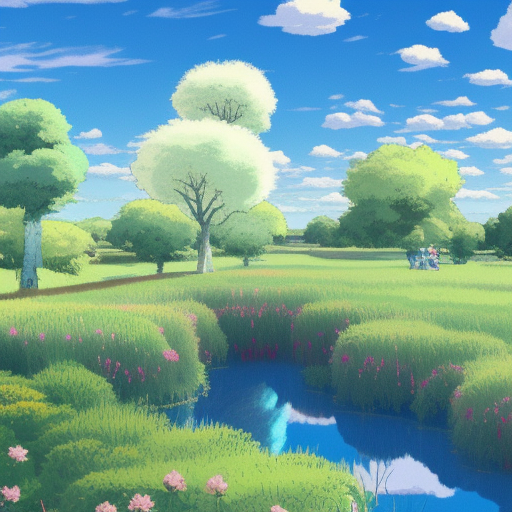

In [6]:
# Set up our warning to print to the console if the adult content classifier is tripped.
# If adult content classifier is not tripped, save generated images.
for resp in answers:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request activated the API's safety filters and could not be processed."
                "Please modify the prompt and try again.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            img = Image.open(io.BytesIO(artifact.binary))
            img.save(str(artifact.seed)+ ".png") # Save our generated images with their seed number as the filename.

img